In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot results of glm
- **make sure to run glm.py first!!**
- output of glm.py is a results.csv file in each respective group folder

In [8]:
### features to exclude from plots
excludeftrs = ['wings', 'fmLS', 'fmFV', 'mfLS', 'mfFV']

In [9]:
### manipulated groups that were run together and their respective controls
mani_Groups = [
    "AD_control_BD",
    "blind",
    "blind_deaf",
    "deaf",
]

### genetically manipulated groups and their respective controls
geno_groups = [
    "AD_control",
    "LC31_Kir",
    "vpoEN_Kir"
]

In [10]:
### loading all results file into a big dataframe
allResults_mani = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss'])
for group in mani_Groups:
    results = pd.read_csv(rf'results/{group}/results.csv', usecols=['feature', 'pCor', 'f1_score', 'logloss'])
    results['group']=group
    allResults_mani = pd.concat([allResults_mani, results], ignore_index=True)

### loading all results file into a big dataframe
allResults_geno = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss'])
for group in geno_groups:
    results = pd.read_csv(rf'results/{group}/results.csv', usecols=['feature', 'pCor', 'f1_score', 'logloss'])
    results['group']=group
    allResults_geno = pd.concat([allResults_geno, results], ignore_index=True)

In [11]:
### excluding unwanted features and determining the plot order based on the control group
maniResults_simple = allResults_mani[~allResults_mani['feature'].isin(excludeftrs)]
order = maniResults_simple[maniResults_simple['group']=='AD_control_BD'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

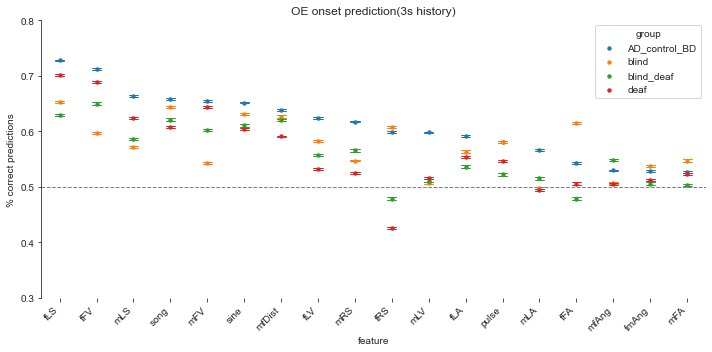

In [12]:
### plot one of the groups
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=maniResults_simple, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.3,0.8)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction(3s history)')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
plt.savefig('results/OE_onset_prediction_manipulated_3s.png')

In [13]:
### do the other group now
genoResults_simple = allResults_geno[~allResults_geno['feature'].isin(excludeftrs)]

order = genoResults_simple[genoResults_simple['group']=='AD_control'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

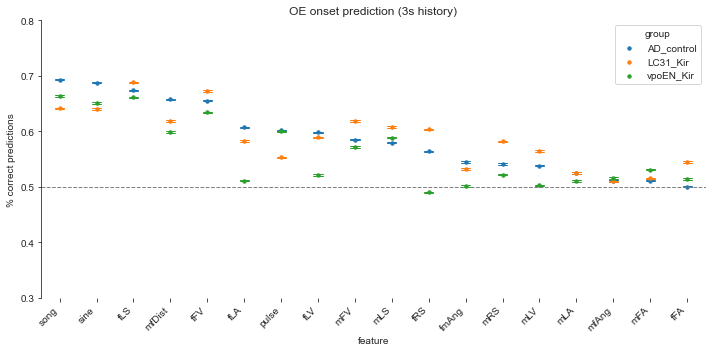

In [14]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=allResults_geno, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.3,0.8)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction (3s history)')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
plt.savefig('results/OE_onset_prediction_silenced_3s.png')


## plotting 10s window

In [27]:
### loading all results file into a big dataframe
allResults_mani_10 = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss'])
for group in mani_Groups:
    results = pd.read_csv(rf'results/{group}/1500_results.csv', usecols=['feature', 'pCor', 'f1_score', 'logloss'])
    results['group']=group
    allResults_mani_10 = pd.concat([allResults_mani_10, results], ignore_index=True)

### loading all results file into a big dataframe
allResults_geno_10 = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss'])
for group in geno_groups:
    results = pd.read_csv(rf'results/{group}/1500_results.csv', usecols=['feature', 'pCor', 'f1_score', 'logloss'])
    results['group']=group
    allResults_geno_10 = pd.concat([allResults_geno_10, results], ignore_index=True)

In [28]:
### excluding unwanted features and determining the plot order based on the control group
allResults_mani_10 = allResults_mani_10[~allResults_mani_10['feature'].isin(excludeftrs)]
order = allResults_mani_10[allResults_mani_10['group']=='AD_control_BD'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

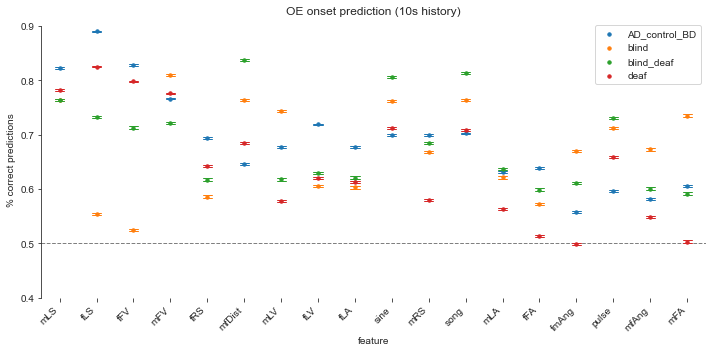

In [40]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=allResults_mani_10, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.4,0.91)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction (10s history)')
plt.legend(loc='upper right')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
plt.savefig('results/OE_onset_prediction_manipulated_10s.png')


In [37]:
### excluding unwanted features and determining the plot order based on the control group
allResults_geno_10 = allResults_geno_10[~allResults_geno_10['feature'].isin(excludeftrs)]
order = allResults_geno_10[allResults_geno_10['group']=='AD_control'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

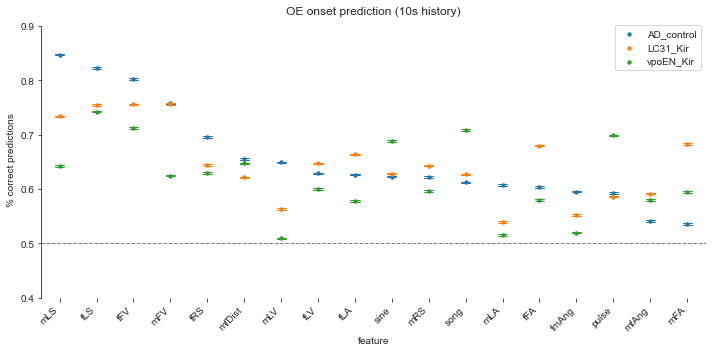

In [41]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=allResults_geno_10, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.4,0.91)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction (10s history)')
plt.legend(loc='upper right')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
plt.savefig('results/OE_onset_prediction_silenced_10s.png')
